In [1]:
%load_ext autoreload
%autoreload 2
viz_cortex = __import__('03_viz_cortex')
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
import h5py
import pickle as pkl
from copy import deepcopy
import os.path
import sys
import cortex
sys.path.append('..')
fit_decoding = __import__('02_fit_decoding')

In [ ]:
corrs_thresh, coefs, norms, contributions_test = \
    viz_cortex.load_corrs_and_coefs()

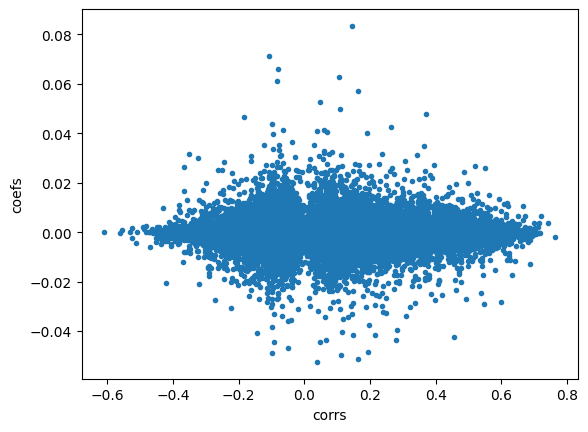

In [4]:
plt.plot(corrs_thresh, contributions_test, '.')
plt.xlabel('corrs')
plt.ylabel('coefs')
plt.show()

# Sanity checks

In [70]:
encoding_result_dir='/home/chansingh/mntv1/deep-fMRI/results/encoding/bert-10__ndel=4/UTS03/'
decoding_results = '/home/chansingh/.tmp/rotten_tomatoes_bert-10__ndel=4fmri_perc=0_seed=1.pkl'

In [71]:
corrs = np.load(join(encoding_result_dir, 'corrs.npz'))['arr_0']

In [72]:
decoding_coef = '/home/chansingh/.tmp/coef_rotten_tomatoes_bert-10__ndel=4fmri_perc=0_seed=1.pkl'

In [73]:
model = pkl.load(open(decoding_coef, 'rb'))
coefs_learned = model.best_estimator_.coef_.squeeze()

In [74]:
coefs_learned.shape
perc_threshold = 0
perc = np.percentile(corrs, perc_threshold)
idxs = (corrs > perc)
corrs_thresh = deepcopy(corrs)
corrs_thresh[~idxs] = np.nan

In [75]:
assert coefs_learned.size == idxs.sum(), 'Learned coefs should match size of repr'
coefs = deepcopy(corrs)
coefs[idxs] = coefs_learned
coefs[~idxs] = np.nan

In [ ]:
viz_cortex.quickshow(coefs)

## Look at rois

In [3]:
roi_verts = cortex.get_roi_verts('UTS03', 'FFA')

In [4]:
roi_verts

{'FFA': array([ 46390,  46398,  46399, ..., 236655, 236656, 237981])}

In [47]:
mask = cortex.db.get_mask('UTS03', 'UTS03_auto', 'thick')

In [ ]:


subject = "UTS03"
xfm = "UTS03_auto"

# Get the map of which voxels are inside of our ROI
index_volume, index_keys = cortex.utils.get_roi_masks(subject, xfm,
                               roi_list=None, # Default (None) gives all available ROIs in overlays.svg
                               gm_sampler='cortical-conservative', # Select only voxels mostly within cortex
                               split_lr=True, # Separate left/right ROIs (this occurs anyway with index volumes)
                               threshold=0.9, # convert probability values to boolean mask for each ROI
                               return_dict=False # return index volume, not dict of masks
                               )

lim = np.max(np.abs(index_volume))
# Plot the mask for one ROI onto a flatmap
roi_data = cortex.Volume(index_volume, subject, xfm,
                         vmin=-lim, # This is a probability mask, so only
                         vmax=lim, # so scale btw zero and one
                         cmap="RdBu_r", # Shades of blue for L hem, red for R hem ROIs
                         )

cortex.quickflat.make_figure(roi_data,
                             thick=1, # select a single depth (btw white matter & pia)
                             sampler='nearest', # no interpolation
                             with_curvature=True,
                             with_colorbar=True,
                             )
print("Index keys for which ROI is which in `index_volume`:")
print(index_keys)
plt.show()

In [57]:
index_volume.shape, mask.shape, index_volume[mask].shape

((54, 84, 84), (54, 84, 84), (95556,))

In [59]:
(index_volume!=0).sum(), (index_volume[mask]!=0).sum()

(6511, 6511)

In [21]:
index_volume.flatten().shape

(381024,)